In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
df.shape

(16719, 16)

In [5]:
df = df.dropna()

In [6]:
df.shape

(6825, 16)

In [7]:
# Only select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation with Global_Sales
correlation_with_global_sales = numeric_cols.corr()['Global_Sales'].sort_values(ascending=False)

# Display it
print(correlation_with_global_sales)


Global_Sales       1.000000
NA_Sales           0.955793
EU_Sales           0.939313
Other_Sales        0.804028
JP_Sales           0.613546
Critic_Count       0.290397
User_Count         0.264151
Critic_Score       0.237556
User_Score         0.088349
Year_of_Release    0.006661
Name: Global_Sales, dtype: float64


In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


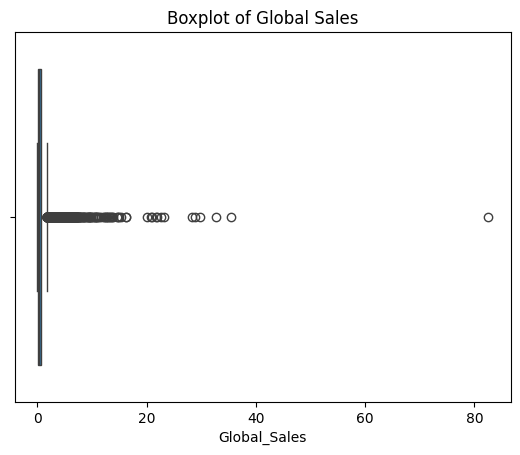

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df["Global_Sales"])
plt.title("Boxplot of Global Sales")
plt.show()


In [10]:
Q1 = df["Global_Sales"].quantile(0.25)
Q3 = df["Global_Sales"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Global_Sales"] >= lower_bound) & (df["Global_Sales"] <= upper_bound)]


In [11]:
df.shape

(6145, 16)

In [12]:
# Loop through all object (string) columns and print unique values
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'Name':
['Dishonored' 'The Beatles: Rock Band' 'Ace Combat 5: The Unsung War' ...
 'E.T. The Extra-Terrestrial' 'Breach' 'STORM: Frontline Nation']
----------------------------------------
Unique values in 'Platform':
['X360' 'Wii' 'PS2' 'XB' 'DS' 'PS3' 'PC' 'PS4' 'GBA' 'GC' 'PSP' 'PS'
 'XOne' '3DS' 'WiiU' 'PSV' 'DC']
----------------------------------------
Unique values in 'Genre':
['Action' 'Misc' 'Simulation' 'Racing' 'Shooter' 'Sports' 'Role-Playing'
 'Platform' 'Strategy' 'Fighting' 'Adventure' 'Puzzle']
----------------------------------------
Unique values in 'Publisher':
['Bethesda Softworks' 'MTV Games' 'Sony Computer Entertainment Europe'
 'Electronic Arts' 'Mindscape' 'Valve' 'Hello Games'
 'Sony Computer Entertainment' 'Take-Two Interactive' 'Infogrames'
 'Capcom' 'Sega' 'THQ' 'Nintendo' 'Namco Bandai Games' 'LucasArts'
 'Activision' 'Midway Games' 'Ubisoft' 'Deep Silver'
 'Warner Bros. Interactive Entertainment' 'Atari' 'Microsoft Game Studios'
 'Square E

In [13]:
# Show number of unique values for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"'{col}': {df[col].nunique()} unique values")


'Name': 4063 unique values
'Platform': 17 unique values
'Genre': 12 unique values
'Publisher': 263 unique values
'Developer': 1252 unique values
'Rating': 5 unique values


In [14]:
top_20_publishers = df['Publisher'].value_counts().head(25).index.tolist()

total = len(df)
top_coverage = df['Publisher'].isin(top_20_publishers).sum()
print(f"Top 20 covers {top_coverage} out of {total} rows ({(top_coverage/total)*100:.2f}%)")


Top 20 covers 4972 out of 6145 rows (80.91%)


In [15]:
# Count occurrences of each publisher
publisher_counts = df['Publisher'].value_counts()

# Define thresholds
top_publishers = publisher_counts.head(25).index
mid_publishers = publisher_counts[25:75].index  # Next 50
low_publishers = publisher_counts[75:].index    # The rest

# Create a new column 'Publisher_Tier'
def classify_publisher(publisher):
    if publisher in top_publishers:
        return 'Top'
    elif publisher in mid_publishers:
        return 'Mid'
    else:
        return 'Low'

df['Publisher_Tier'] = df['Publisher'].apply(classify_publisher)

# Now calculate the percentages
total_publishers = len(df)
tier_counts = df['Publisher_Tier'].value_counts()
tier_percentages = (tier_counts / total_publishers) * 100

# Print nicely
print(tier_percentages.round(2))


Publisher_Tier
Top    80.91
Mid    12.90
Low     6.18
Name: count, dtype: float64


In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordinal encoding for Rating
rating_order = ['RP', 'EC', 'E', 'E10+', 'T', 'M']  # RP added as the least mature rating
ordinal_encoder = OrdinalEncoder(categories=[rating_order])
df['Rating_encoded'] = ordinal_encoder.fit_transform(df[['Rating']])

# One-hot encoding for Publisher_Tier
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
tier_encoded = ohe.fit_transform(df[['Publisher_Tier']])

# Add the encoded columns to the dataframe
tier_encoded_df = pd.DataFrame(tier_encoded, columns=ohe.get_feature_names_out(['Publisher_Tier']), index=df.index)
df = pd.concat([df, tier_encoded_df], axis=1)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6145 entries, 1041 to 16706
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6145 non-null   object 
 1   Platform            6145 non-null   object 
 2   Year_of_Release     6145 non-null   float64
 3   Genre               6145 non-null   object 
 4   Publisher           6145 non-null   object 
 5   NA_Sales            6145 non-null   float64
 6   EU_Sales            6145 non-null   float64
 7   JP_Sales            6145 non-null   float64
 8   Other_Sales         6145 non-null   float64
 9   Global_Sales        6145 non-null   float64
 10  Critic_Score        6145 non-null   float64
 11  Critic_Count        6145 non-null   float64
 12  User_Score          6145 non-null   float64
 13  User_Count          6145 non-null   float64
 14  Developer           6145 non-null   object 
 15  Rating              6145 non-null   object 
 16  Publish

In [18]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode 'Platform'
ohe_platform = OneHotEncoder(drop='first', sparse_output=False)
platform_encoded = ohe_platform.fit_transform(df[['Platform']])
platform_df = pd.DataFrame(platform_encoded, columns=ohe_platform.get_feature_names_out(['Platform']))

# One-Hot Encode 'Genre'
ohe_genre = OneHotEncoder(drop='first', sparse_output=False)
genre_encoded = ohe_genre.fit_transform(df[['Genre']])
genre_df = pd.DataFrame(genre_encoded, columns=ohe_genre.get_feature_names_out(['Genre']))

# Drop original columns
df = df.drop(columns=['Platform', 'Genre'])

# Concatenate new encoded columns
df = pd.concat([df.reset_index(drop=True), platform_df, genre_df], axis=1)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6145 entries, 0 to 6144
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6145 non-null   object 
 1   Year_of_Release     6145 non-null   float64
 2   Publisher           6145 non-null   object 
 3   NA_Sales            6145 non-null   float64
 4   EU_Sales            6145 non-null   float64
 5   JP_Sales            6145 non-null   float64
 6   Other_Sales         6145 non-null   float64
 7   Global_Sales        6145 non-null   float64
 8   Critic_Score        6145 non-null   float64
 9   Critic_Count        6145 non-null   float64
 10  User_Score          6145 non-null   float64
 11  User_Count          6145 non-null   float64
 12  Developer           6145 non-null   object 
 13  Rating              6145 non-null   object 
 14  Publisher_Tier      6145 non-null   object 
 15  Rating_encoded      6145 non-null   float64
 16  Publis

In [20]:
# Get value counts and percentage
dev_counts = df['Developer'].value_counts()
total_devs = len(df)
dev_percentage = (dev_counts / total_devs) * 100

# Show top 10 as preview
dev_percentage.head(10)


Developer
EA Canada           2.099268
EA Sports           1.969081
Capcom              1.692433
Ubisoft             1.480879
Konami              1.415785
Ubisoft Montreal    1.139138
EA Tiburon          1.090317
Omega Force         1.090317
Electronic Arts     0.992677
Codemasters         0.927583
Name: count, dtype: float64

In [21]:
# Calculate the percentage occurrence of each developer
dev_counts = df['Developer'].value_counts()
dev_percentage = (dev_counts / len(df)) * 100

# Function to classify developers
def classify_developer(dev):
    pct = dev_percentage.get(dev, 0)
    if pct > 1:
        return 'Top'
    elif pct > 0.5:
        return 'Mid'
    else:
        return 'Low'

# Apply the function to create a new column
df['Developer_Tier'] = df['Developer'].apply(classify_developer)

# Check the percentage of each tier
print(df['Developer_Tier'].value_counts(normalize=True) * 100)


Developer_Tier
Low    75.947925
Mid    12.074858
Top    11.977217
Name: proportion, dtype: float64


In [22]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
dev_tier_ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform
developer_tier_encoded = dev_tier_ohe.fit_transform(df[['Developer_Tier']])

# Create DataFrame with proper column names
developer_tier_df = pd.DataFrame(developer_tier_encoded, columns=dev_tier_ohe.get_feature_names_out(['Developer_Tier']))

# Reset index to align before concatenation
developer_tier_df.index = df.index

# Concatenate with original df
df = pd.concat([df, developer_tier_df], axis=1)


In [23]:
df.isnull().sum()

Name                  0
Year_of_Release       0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating                0
Publisher_Tier        0
Rating_encoded        0
Publisher_Tier_Mid    0
Publisher_Tier_Top    0
Platform_DC           0
Platform_DS           0
Platform_GBA          0
Platform_GC           0
Platform_PC           0
Platform_PS           0
Platform_PS2          0
Platform_PS3          0
Platform_PS4          0
Platform_PSP          0
Platform_PSV          0
Platform_Wii          0
Platform_WiiU         0
Platform_X360         0
Platform_XB           0
Platform_XOne         0
Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role-Playing    0
Genre_Shooter   

In [24]:
df.shape

(6145, 48)

In [25]:
df.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Developer_Tier,Developer_Tier_Mid,Developer_Tier_Top
0,Dishonored,2012.0,Bethesda Softworks,1.06,0.50,0.01,0.14,1.71,88.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0
1,The Beatles: Rock Band,2009.0,MTV Games,1.17,0.39,0.00,0.15,1.71,89.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0
2,Ace Combat 5: The Unsung War,2004.0,Sony Computer Entertainment Europe,0.88,0.34,0.32,0.18,1.71,84.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Mid,1.0,0.0
3,Need for Speed Underground,2003.0,Electronic Arts,1.09,0.55,0.00,0.07,1.71,83.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mid,1.0,0.0
4,Deal or No Deal,2007.0,Mindscape,1.15,0.40,0.00,0.15,1.70,20.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0


In [26]:
df.shape

(6145, 48)

In [27]:
df.dtypes

Name                   object
Year_of_Release       float64
Publisher              object
NA_Sales              float64
EU_Sales              float64
JP_Sales              float64
Other_Sales           float64
Global_Sales          float64
Critic_Score          float64
Critic_Count          float64
User_Score            float64
User_Count            float64
Developer              object
Rating                 object
Publisher_Tier         object
Rating_encoded        float64
Publisher_Tier_Mid    float64
Publisher_Tier_Top    float64
Platform_DC           float64
Platform_DS           float64
Platform_GBA          float64
Platform_GC           float64
Platform_PC           float64
Platform_PS           float64
Platform_PS2          float64
Platform_PS3          float64
Platform_PS4          float64
Platform_PSP          float64
Platform_PSV          float64
Platform_Wii          float64
Platform_WiiU         float64
Platform_X360         float64
Platform_XB           float64
Platform_X

In [28]:
# Only select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation with Global_Sales
correlation_with_global_sales = numeric_cols.corr()['Global_Sales'].sort_values(ascending=False)

# Display it
print(correlation_with_global_sales)


Global_Sales          1.000000
NA_Sales              0.863982
EU_Sales              0.771524
Other_Sales           0.715829
Critic_Count          0.343064
JP_Sales              0.296878
Critic_Score          0.291991
Publisher_Tier_Top    0.177222
User_Score            0.144780
User_Count            0.141904
Platform_PS3          0.129141
Developer_Tier_Mid    0.123517
Developer_Tier_Top    0.092484
Platform_X360         0.071811
Genre_Sports          0.068182
Platform_PS2          0.055601
Platform_Wii          0.054142
Platform_PS           0.043325
Platform_XOne         0.026961
Genre_Misc            0.024377
Genre_Fighting        0.022904
Genre_Shooter         0.018866
Genre_Platform        0.017254
Year_of_Release       0.009150
Platform_WiiU         0.005668
Genre_Racing          0.001489
Platform_DC          -0.008282
Genre_Simulation     -0.008804
Platform_GBA         -0.009539
Platform_PS4         -0.022561
Platform_PSP         -0.023959
Genre_Role-Playing   -0.027281
Rating_e

In [36]:
import numpy as np

# Use log1p to avoid issues with zero values (it does log(1 + x))
df['Log_Global_Sales'] = np.log1p(df['Global_Sales'])


In [37]:

from sklearn.model_selection import train_test_split

# Assuming 'Global_Sales' is your target
# Drop irrelevant columns
X = df.drop(columns=["Global_Sales","Log_Global_Sales","Critic_Count","User_Count",'Year_of_Release','Name','Publisher', 'Developer', 'Rating', 'Publisher_Tier', 'Developer_Tier','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

y = df['Log_Global_Sales']


# Split the data into train and test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [38]:
X_train

,Critic_Score,User_Score,Rating_encoded,Publisher_Tier_Mid,Publisher_Tier_Top,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Developer_Tier_Mid,Developer_Tier_Top
5319,86.0,8.2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
443,53.0,5.4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3425,90.0,7.6,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5017,36.0,2.4,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2611,64.0,6.8,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,78.0,8.1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5191,79.0,8.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5226,71.0,7.6,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,78.0,7.4,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_train.tail()

,Critic_Score,User_Score,Rating_encoded,Publisher_Tier_Mid,Publisher_Tier_Top,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Developer_Tier_Mid,Developer_Tier_Top
3772,78.0,8.1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5191,79.0,8.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5226,71.0,7.6,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,78.0,7.4,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,76.0,7.9,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression
R² Score: 0.24461417740336378
MAE: 0.1764980377566646
RMSE: 0.22542545011365006


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regressor
R² Score: 0.25501559958363296
MAE: 0.17256061417454752
RMSE: 0.22386805198681275


In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regressor")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree Regressor
R² Score: -0.36440462911538085
MAE: 0.2217868905348372
RMSE: 0.30296336989483813


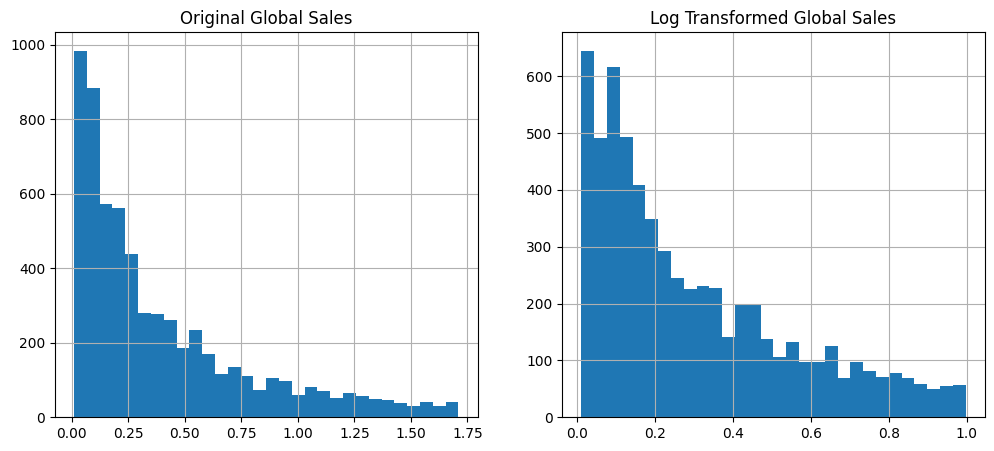

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['Global_Sales'].hist(bins=30)
plt.title("Original Global Sales")

plt.subplot(1,2,2)
df['Log_Global_Sales'].hist(bins=30)
plt.title("Log Transformed Global Sales")
plt.show()


In [45]:
def sales_category(sales):
    if sales < 10:
        return 0
    elif sales < 20:
        return 1
    elif sales < 30:
        return 2
    elif sales < 40:
        return 3
    else:
        return 4

df_class = df.copy()
df_class['Sales_Category'] = df_class['Global_Sales'].apply(sales_category)


In [46]:
X = df_class.drop(['Global_Sales', 'Sales_Category'], axis=1)
y = df_class['Sales_Category']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
X_train

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Developer_Tier,Developer_Tier_Mid,Developer_Tier_Top,Log_Global_Sales
5319,Rocket League,2016.0,505 Games,0.01,0.04,0.00,0.00,86.0,20.0,8.2,...,0.0,0.0,0.0,0.0,1.0,0.0,Low,0.0,0.0,0.058269
443,Medal of Honor: Warfighter,2012.0,Electronic Arts,0.59,0.45,0.01,0.10,53.0,43.0,5.4,...,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0,0.765468
3425,NBA 2K2,2002.0,Sega,0.15,0.04,0.00,0.01,90.0,17.0,7.6,...,0.0,0.0,0.0,0.0,1.0,0.0,Mid,1.0,0.0,0.182322
5017,The History Channel: Battle for the Pacific,2008.0,Activision,0.07,0.00,0.00,0.01,36.0,7.0,2.4,...,0.0,0.0,1.0,0.0,0.0,0.0,Low,0.0,0.0,0.067659
2611,Harry Potter and the Half-Blood Prince,2009.0,Electronic Arts,0.17,0.11,0.00,0.03,64.0,38.0,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0,0.270027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,LEGO Marvel Super Heroes,2013.0,Warner Bros. Interactive Entertainment,0.04,0.12,0.00,0.01,78.0,7.0,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Mid,1.0,0.0,0.157004
5191,Monster Tale,2011.0,Majesco Entertainment,0.06,0.00,0.00,0.00,79.0,15.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0,0.058269
5226,Cold Fear,2005.0,Ubisoft,0.05,0.01,0.00,0.00,71.0,41.0,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,Low,0.0,0.0,0.058269
5390,Metal Slug Anthology,2007.0,Ignition Entertainment,0.02,0.00,0.02,0.01,78.0,26.0,7.4,...,0.0,0.0,1.0,0.0,0.0,0.0,Low,0.0,0.0,0.048790
